<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/3.1ekstraksi_dan_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim
import ast

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

load korpus

In [2]:
korpus1a = '/content/drive/MyDrive/korpus1dataisear(preputama).csv'
korpus1b = '/content/drive/MyDrive/korpus1dataisear(preptambah).csv'
korpus2a = '/content/drive/MyDrive/korpus2(preputama).csv'
korpus2b = '/content/drive/MyDrive/korpus2(preptambah).csv'
df = pd.read_csv(korpus2b)

In [ ]:
# df=df.drop(df[df['emosi'] == 'shame'].sample(frac=1).index)
# df=df.drop(df[df['emosi'] == 'guilt'].sample(frac=1).index)
# df=df.drop(df[df['emosi'] == 'disgust'].sample(frac=1).index)

In [3]:
temp=[]
for senten in df.content:
  temp.append(ast.literal_eval(senten))
df.content=temp

pilih model

In [4]:
pakai_model=1

load model

In [5]:
from gensim.models import word2vec
!pip install glove-python-binary
from glove import Glove
from glove import Corpus

     |████████████████████████████████| 948 kB 5.0 MB/s 


In [26]:
if pakai_model == 1:#load model word2vec
  model = gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/korpus2+blog(preputama).w2v')

elif pakai_model == 2:#load model glove
  model=Glove.load('/content/drive/MyDrive/korpus2+blog(preptambah).glove')

cek model

In [7]:
if pakai_model == 1:
  print(model.wv.vectors.shape)
elif pakai_model == 2:
  print(model.word_vectors.shape)

(909479, 100)


In [8]:
if pakai_model == 1:
  print(model.wv["yes"])
elif pakai_model == 2:
  print(model.word_vectors[model.dictionary['yes']])

[ 0.25244895  0.08393814 -0.6096571  -0.34387097  0.06838273  0.25723606
  0.0266196  -0.01434578 -0.07774691  0.2140907   0.15357822  0.5744826
 -0.00833396 -0.31050277  0.5868915   0.23526698 -0.16583624  0.34734324
  0.02856156 -0.28496426  0.01012061 -0.48710278  0.34248713 -0.1079952
 -0.13008507  0.31120253  0.4718614   0.10062152  0.2849175  -0.6728034
  0.36018905 -0.16804506  0.54409933  0.5200733  -0.3402118  -0.3126636
  0.10754591 -0.02313331  0.62040585  0.18188368  0.02699847  0.14514698
 -0.28947395  0.19376232 -0.6815062  -0.39827138  0.46102327 -0.06390835
 -0.4236161   0.42716616 -0.2780824   0.26952326 -0.12759471 -0.03410916
  0.4421349  -0.34948245  0.03173502 -0.2469636  -0.39195466 -0.16232488
  0.68995255 -0.24213244 -0.16165505 -0.1801585   0.00701837 -0.0955204
 -0.1881183   0.00353647 -0.33717886 -0.30481067  0.31168374  0.32380748
  0.15936862  0.48250446  0.03381822 -0.31114158 -0.14226326 -0.01857329
 -0.3722813   0.28880695  0.07633575  0.04869148  0.1553

ambil conntoh model wor embedding

In [ ]:
import array
count=0
simpanang=[]
simpankat=[]
jml=24
if pakai_model == 1:
  for senten in df.dokumen:
    for word in senten:
      simpanang.append(model.wv[word])
      simpankat.append(word)
      if count<jml:
        count+=1
      else :
        break
    if count<jml:
      count+=1
    else :
      break

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      simpanang.append(model.word_vectors[model.dictionary[word]])
      simpankat.append(word)
      if count<jml:
        count+=1
      else :
        break
    if count<jml:
      count+=1
    else :
      break


In [ ]:
dfang=pd.DataFrame(simpanang)
dfkat=pd.DataFrame(simpankat)
result = pd.concat([dfkat, dfang], axis=1)
result.shape

(24, 101)

In [ ]:
result.to_excel("preptambah,glove.xlsx")

sum base ekstraksi fitur

In [ ]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)
hitungbiasa=0
hitungpre=0

if pakai_model == 1:
  for senten in df.content:
    jumlah_dipakai=0
    for word in senten:
      try:
        temp=np.add(temp,model.wv[word])
        jumlah_dipakai+=1
        hitungpre+=1
      except:
        temp=np.add(temp,np.zeros((100)))
        hitungbiasa+=1
    if jumlah_dipakai!=0:
      temp=temp/jumlah_dipakai
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.word_vectors[model.dictionary[word]])
    # temp=temp/len(senten)
    ekstrak.append(temp)

has_vec=ekstrak

average base ekstraksi fitur

In [18]:
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [36]:
shortest=[]
urut=0
for panjang in df.content:
  if len(panjang)==0:
    
    urutan=urut
    shortest.append(urutan)
  urut+=1

In [37]:
shortest

[53,
 229,
 1244,
 1898,
 2044,
 2159,
 2985,
 2990,
 3652,
 4131,
 4805,
 6003,
 6009,
 6230,
 6409,
 6465,
 6739,
 7431,
 8010,
 8616,
 8948]

In [29]:
urutan

53

In [25]:
df.content.iloc[53]

[]

In [11]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)

if pakai_model == 1:
  for senten in df.content:
    for word in senten:
      temp=np.add(temp,model.wv[word])
    temp=temp/len(senten)
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.word_vectors[model.dictionary[word]])
    temp=temp/len(senten)
    ekstrak.append(temp)

has_vec=ekstrak

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [12]:
X=has_vec
y=df.sentiment
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(9301, 100)
(9301,)


klasifikasi svm

In [13]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [14]:
def klasifikasi(y_pred):
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

In [15]:
clf = svm.SVC(kernel='poly', decision_function_shape='ovr', C=17.0)
# acc10k=cross_val_score(clf, X, y, cv=10)
# np.mean(acc10k)
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: ignored

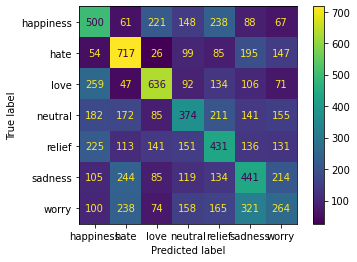

0.3615740242984625
(0.3570576234456086, 0.3613195787591571, 0.35772602562112976, None)


In [ ]:
clf = svm.SVC(kernel='rbf', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

In [ ]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)